### 생선 분류 최적의 K찾기 : 하이퍼파라메터
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Lenght
- 타겟/라벨 : Species
- 학습방법 : 지도학습 -> 분류
- 학습알고리즘 : 최근접이웃알고리즘
- 하이퍼파라미터 튜닝 : 모델 성능 개선

1. 데이터준비

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
FILE = '../data/fish.csv'

In [5]:
# 행 : Bream, Smelt, 컬럼 : Species, Weight, Height -> 0,1,2
fishdf = pd.read_csv(FILE, usecols=[0,1,2])
fishdf

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [6]:
mask = (fishdf['Species'] == 'Bream') | (fishdf['Species'] == 'Smelt')
twodf = fishdf[mask]
twodf.reset_index(drop=True, inplace=True)
twodf.index

RangeIndex(start=0, stop=49, step=1)

In [7]:
# Species 컬럼 수치화 -> Bream 0 , Smelt 1
new_col=twodf.loc[:, 'FCode'] = twodf.loc[:, 'Species'].replace({'Bream': 0, 'Smelt': 1})
twodf["FCode"] = new_col


C:\Users\KDP-26\AppData\Local\Temp\ipykernel_18168\3699467760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col=twodf.loc[:, 'FCode'] = twodf.loc[:, 'Species'].replace({'Bream': 0, 'Smelt': 1})
C:\Users\KDP-26\AppData\Local\Temp\ipykernel_18168\3699467760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twodf["FCode"] = new_col


In [8]:
twodf.head(3)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0


### 2. 타겟 피쳐와 타겟분리

In [9]:
features=twodf[['Weight','Length']]
target=twodf['FCode']

features.shape, features.ndim, target.shape, target.ndim

((49, 2), 2, (49,), 1)

### 3 데이터셋 준비 -> 학습용, 테스트용

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# train:test = 80:20 -> test_size=0.2 or train_size = 0.8
# stratify 매개변수 : 분류할 때 사용함, 회귀일 때는 사용 안함
# 분류 타겟의 종류에 대한 비율을 고려 할 때 사용, data set 준비
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    stratify=target, random_state=10)


In [12]:
# train:test = 80:20 체크
print(f'{X_train.shape}, {X_train.ndim}')
print(f'{y_train.shape}, {y_train.ndim}')

print()

print(f'{X_test.shape}, {X_test.ndim}')
print(f'{y_test.shape}, {y_test.ndim}')

(39, 2), 2
(39,), 1

(10, 2), 2
(10,), 1


In [13]:
# target 0(Bream), 1(Smelt)의 비율
# 학습용
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [14]:
# 테스트용
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

### 3-2. 피쳐 스케일링

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()


In [17]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [18]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [19]:
X_train.max(), X_train.min()
# 학습용 데이터셋 스케일링 -> ndarray 타입
x_train_scale=mmScaler.transform(X_train)
x_train_scale.shape

(39, 2)

In [20]:
# 테스트용 데이터셋 --> 스케일링 -> ndarray 타입
x_test_scale = mmScaler.transform(X_test)
x_test_scale.shape, x_test_scale.min(), x_test_scale.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

### 4. 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [23]:
# 학습 진행
model.fit(x_train_scale, y_train)

KNeighborsClassifier()

In [24]:
# 학습 진행 후 모델 파라미터 확인하기
model.classes_ ,  model.n_samples_fit_
# model.feature_names_in_, ndarray일 경우 컬럼명 X


(array([0, 1], dtype=int64), 39)

### 5 모델 성능평가 --> score() 메서드 test 데이터셋 사용

In [25]:
model.score(x_test_scale, y_test)

1.0

### 최적의 K 개수 찾기 -> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [26]:
scores, points = [], []
for k in range(1, 40):
    model.n_neighbors = k  # 최근접 이웃 데이터 수 설정

    # 모델을 학습 데이터로 훈련
    model.fit(x_train_scale, y_train)

    # 점수 계산
    jumsu = model.score(x_test_scale, y_test)
    print(f'[{k}] jumsu : {jumsu}')
    if k>1:
        if jumsu != scores[-1]: points.append(k)
    scores.append(jumsu)


[1] jumsu : 1.0
[2] jumsu : 1.0
[3] jumsu : 1.0
[4] jumsu : 1.0
[5] jumsu : 1.0
[6] jumsu : 1.0
[7] jumsu : 1.0
[8] jumsu : 1.0
[9] jumsu : 1.0
[10] jumsu : 1.0
[11] jumsu : 1.0
[12] jumsu : 1.0
[13] jumsu : 1.0
[14] jumsu : 1.0
[15] jumsu : 1.0
[16] jumsu : 1.0
[17] jumsu : 1.0
[18] jumsu : 1.0
[19] jumsu : 1.0
[20] jumsu : 1.0
[21] jumsu : 1.0
[22] jumsu : 0.7
[23] jumsu : 0.7
[24] jumsu : 0.7
[25] jumsu : 0.7
[26] jumsu : 0.7
[27] jumsu : 0.7
[28] jumsu : 0.7
[29] jumsu : 0.7
[30] jumsu : 0.7
[31] jumsu : 0.7
[32] jumsu : 0.7
[33] jumsu : 0.7
[34] jumsu : 0.7
[35] jumsu : 0.7
[36] jumsu : 0.7
[37] jumsu : 0.7
[38] jumsu : 0.7
[39] jumsu : 0.7


In [27]:
points

[22]

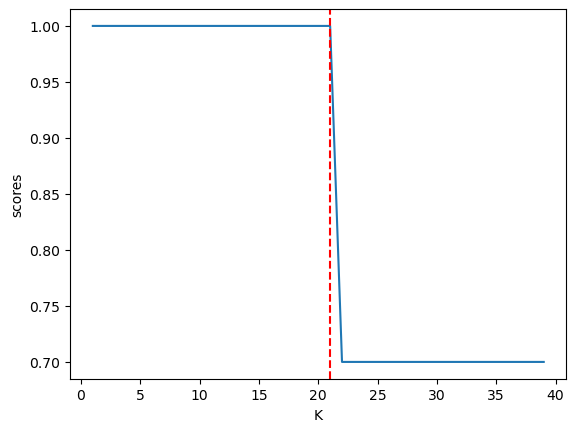

In [28]:
# x축, y축 점수
plt.plot(range(1, 40), scores)
plt.xlabel("K")
plt.ylabel("scores")
plt.axvline(points[0]-1, 0.0, 1.0, color='red', linestyle='dashed') # xhline(수평) v는 수직
plt.show()

### 6. 예측 하기 ---> 학습/훈련과 텍스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터가 2D 형태여야함.

In [29]:
new_data = pd.DataFrame([[413, 27.8]], columns=['Weight', 'Length'])
new_data

,Weight,Length
0,413,27.8


In [30]:
n_d_scaled=mmScaler.transform(new_data)
n_d_scaled

array([[0.40904057, 0.57692308]])

In [31]:
# 새로운 데이터의 예측
model.predict(n_d_scaled)

array([0], dtype=int64)

In [32]:
### 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(n_d_scaled)

In [33]:
n_d_scaled[0,0], n_d_scaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
feature = fishdf[['Weight']]
target = fishdf['Length']
print(feature.shape)
print(target.shape)

(159, 1)
(159,)


In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Weight로 Length를 예측하는 회귀 모델
model = KNeighborsRegressor()
model.fit(feature, target)

# 예측
predictions = model.predict(feature)
print(predictions)


[26.48 26.86 31.2  31.2  33.84 33.84 33.58 31.54 33.84 33.58 32.94 33.58
 33.58 31.2  33.2  33.2  34.8  34.8  33.2  35.2  35.7  35.1  33.1  35.1
 34.8  34.8  34.8  34.8  38.   41.5  41.74 42.34 41.74 43.04 42.34 14.74
 17.72 19.22 19.22 20.8  11.96 20.56 20.8  22.04 22.44 22.88 21.98 22.88
 22.82 23.18 25.8  23.8  26.86 26.4  31.54 26.4  26.4  28.8  37.46 39.68
 41.5  15.74 16.4  19.22 20.8  22.04 21.98 22.82 22.44 25.8  26.4  30.2
 10.12 14.42 14.74 15.1  17.72 19.9  19.22 19.22 19.22 19.22 20.56 20.96
 21.9  21.76 20.8  20.8  21.76 21.94 20.56 21.76 22.04 22.44 22.04 22.82
 26.24 22.44 26.54 23.8  25.8  25.86 30.2  27.3  26.9  27.18 27.18 30.2
 28.   33.7  37.7  38.   35.1  34.8  34.8  35.1  41.74 35.2  37.28 38.
 41.74 42.1  37.28 41.7  41.5  41.7  41.5  41.5  25.8  30.2  30.2  30.2
 33.84 31.2  34.24 33.7  37.46 33.58 37.7  38.68 42.34 44.9  56.48 56.48
 56.48 10.12 10.12 10.12 11.56 11.56 11.2  11.56 11.56 11.56 12.24 12.24
 12.24 13.38 13.38]
